# Google Street View Coverage Disparity

Google Street View is a technology featured in Google Maps and Google Earth that provides interactive panoramas from positions along many streets in the world. It was launched in 2007 in several cities in the United States, and has since expanded to include cities and rural areas worldwide. Streets with Street View imagery available are shown as blue lines on Google Maps.

Google Street View displays interactively panoramas of stitched VR photographs. Most photography is done by car, but some is done by tricycle, boat, snowmobile, and underwater apparatus, as well as on foot.

As of August 2021 however, not all the countries have received an equal coverage, which can be seen from the following images taken from Google Maps

In [ ]:
import os
from IPython.display import Image
Image(filename = "../input/google-street-view-coverage-disparity/11.PNG")

In [ ]:
Image(filename = "../input/google-street-view-coverage-disparity/12.PNG")

In [ ]:
Image(filename = "../input/google-street-view-coverage-disparity/13.PNG")

In [ ]:
Image(filename = "../input/google-street-view-coverage-disparity/14.PNG")

Looking at the global level, one might put forward the hypothesis that those countries which have full street view coverage belong to the 'Developed" countries block. Others might argue that there may be other factors in play here - like the ease of access for Google to map the streets because of terrorism, govt. policies, privacy laws, societal temperament etc.
Some others might say it is just a matter of time.  


Well, leaving aside the aspect of time, let us focus on the other two hypotheses.
Let's try to answer what all these countires have in common that might help us understand the cause of this disparity.
We are going to evaluate these two groups of countries - covered and uncovered quantitatively on *Development Level* and also briefly qualitatively on some possible factors.
_______________________________________________________________________________________________________________________________


We will be commparing a manually compiled list of the names of these street view covered countires with the countries database taken from the UNDP Data center (*http://hdr.undp.org/en/data*). A few points about this dataset:


*	*It has been cleaned in spreadsheet to keep only the data for the most recent year available.*
*	*Separate datasets were downloaded for each indicator, and all of them were combined in the spreadsheet using the VLOOKUP function*
*	*Macao, Taiwan, Puerto Rico, and Monaco were removed from the analysis due to their exclusion from the UNDP Dataset, even though they had full Google Street View coverage.*

-------------------------------------------------------------------------------------------------------------------------------

The Dataset contains the following fields:
* **Countries** - 189 Countries, excluding some like North Korea, Macao, Monaco, Taiwan and some other disputed states
* **Human Development Index 2019** - A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living; measured on a scale of 0-1, with 1 representing very high development.
* **Internet users, total (Percentage of population) 2018** - People with access to the worldwide network.
* **Coefficient of Human Inequality 2019** - Calculated as the arithmetic mean of the values in inequality in life expectancy, inequality in education and inequality in income, measured on a scale of 1-100, with 100 representing most inequality.
* **GDP per capita (2017 PPP Dollar)** - GDP in a particular period divided by the total population in the same period, measured in USD
* **Human Freedom Score 2018** - The Human Freedom Index presents the state of human freedom in the world based on a broad measure that encompasses personal, civil, and economic freedom on a scale of 1-10 with 10 representing highest freedom.



Finally, some average benchmark values for the above metrics:
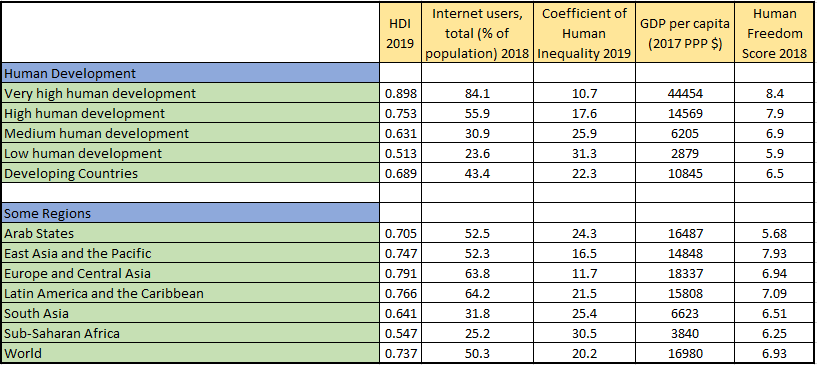

In [ ]:
Image(filename = "../input/google-street-view-coverage-disparity/Benchmarks.PNG")

In [ ]:
# On y va!
import pandas as pd
import numpy as np
import seaborn as sb

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [ ]:
#Reading the UNDP collected DataSet into a pandas dataframe
undp = pd.read_csv('../input/google-street-view-coverage-disparity/UNDP Countries Dataset.csv')

#Reading the manually collected Street View into a pandas dataframe
street_view = pd.read_csv('../input/google-street-view-coverage-disparity/Street View Countries.csv')


In [ ]:
#Checking out the undp datafram
undp

In [ ]:
#Checking out the street_view dataframe
street_view

In [ ]:
#Filtering the undp dataframe based upon the countries which have full street view available
covered = undp[undp['Countries'].isin(street_view['Country'])]
covered

In [ ]:
#Filtering out the other countries
uncovered = undp[~undp['Countries'].isin(street_view['Country'])]
uncovered

In [ ]:
#Checking missing values
covered.isna().sum()

In [ ]:
#Checking missing values
uncovered.isna().sum()

In [ ]:
#Substituting the missing values with column mean
covered = covered.fillna(covered.mean())
uncovered = uncovered.fillna(uncovered.mean())

### Overview of the Relationships

In [ ]:
# Generating a scatterplot comparing HDI and GDP per capita. 
# The plot is coloured to distinguish the covered and uncovered datasets.
# GDP per capita is used to size the different data points.

concatenated = pd.concat([covered.assign(dataset='covered'), uncovered.assign(dataset='uncovered')])

sb.set_style('whitegrid')
compareplot0 = sb.scatterplot(x='HDI 2019', y = 'GDP per capita (2017 PPP $)', data = concatenated, 
                              size = 'Human Freedom Score 2018', alpha = 0.5, hue = 'dataset', 
                              sizes =(10,200), palette = 'tab10' )
plt.legend(loc="upper left", frameon=True, fontsize=12)

In [ ]:
# Generating a 3D scatterplot comparing Human Inequality, Human Freedom and HDI. 
# The plot is coloured to distinguish the covered and uncovered datasets.
# GDP per capita is used to size the different data points.

compareplot01 = sb.scatterplot(x='Human Freedom Score 2018', y = 'Coefficient of Human Inequality 2019' , 
                               data = concatenated, size='Internet users, total (% of population) 2018', 
                               alpha = 0.5, hue = 'dataset', sizes =(10,200), palette = 'tab10' )
plt.legend(loc="upper left", frameon=True, fontsize=12)

In [ ]:
# Generating a 3D scatterplot comparing Human Inequality, Human Freedom and HDI. 
# The plot is coloured to distinguish the covered and uncovered datasets.
# GDP per capita is used to size the different data points.


fig = px.scatter_3d(concatenated, x= 'Coefficient of Human Inequality 2019', 
                    y = 'Human Freedom Score 2018',  z='HDI 2019' ,
                    size = 'GDP per capita (2017 PPP $)', color = 'dataset', 
                    opacity = 1, size_max = 50)
fig.update_layout(scene = dict(xaxis = dict(range=[50,5],),
                    xaxis_title='Coeff. of Human Inequality',
                    yaxis_title='Human Freedom',
                    zaxis_title='HDI'),
                    margin=dict(l=0, r=0, b=0, t=0),
                   #scene_camera = dict(eye=dict(x=2, y=2, z=0.1)
                 )
camera = dict(
    eye=dict(x=2, y=0.75, z=1)
)

fig.update_layout(scene_camera=camera)
fig.show()

As can be seen from the above graphs, the street view covered countires tend to have (as compared to street view uncovered countries):
* A higher HDI rank
* A higher GDP per capita
* Higher number of internet users
* Higher human freedom
* Lower human inequality

Makes you wonder...

### How Each Field Relates to Every Other Field - A More Detailed Comparison

In [ ]:
#sb.pairplot(concatenated, hue = 'dataset')

In [ ]:
#Comparing every field with HDI 2019 Score
compareplot1 = sb.pairplot(concatenated, hue = 'dataset',                           
                          x_vars = ['HDI 2019', 'Internet users, total (% of population) 2018', 
                                    'Coefficient of Human Inequality 2019',  
                                    'GDP per capita (2017 PPP $)','Human Freedom Score 2018'],
                          y_vars = ['HDI 2019'], height = 3 )

In [ ]:
#Comparing every field with Internet users, total (% of population) 2018
compareplot2 = sb.pairplot(concatenated, hue = 'dataset',                            
                          x_vars = ['Internet users, total (% of population) 2018', 'HDI 2019', 
                                    'Coefficient of Human Inequality 2019',  'GDP per capita (2017 PPP $)',
                                    'Human Freedom Score 2018'],
                          y_vars = ['Internet users, total (% of population) 2018'], height = 3)

In [ ]:
#Comparing every field with Coefficient of Human Inequality 2019
compareplot3 = sb.pairplot(concatenated, hue = 'dataset',                           
                          x_vars = ['Coefficient of Human Inequality 2019', 
                                    'Internet users, total (% of population) 2018', 'HDI 2019',  
                                    'GDP per capita (2017 PPP $)','Human Freedom Score 2018'],
                          y_vars = ['Coefficient of Human Inequality 2019'], height = 3)

In [ ]:
#Comparing every field with GDP per capita (2017 PPP $)
compareplot4 = sb.pairplot(concatenated, hue = 'dataset',                           
                          x_vars = ['GDP per capita (2017 PPP $)', 
                                    'Internet users, total (% of population) 2018', 
                                    'Coefficient of Human Inequality 2019',  'HDI 2019',
                                    'Human Freedom Score 2018'],
                          y_vars = ['GDP per capita (2017 PPP $)'], height = 3)

In [ ]:
#Comparing every field with Human Freedom Score 2018
compareplot4 = sb.pairplot(concatenated, hue = 'dataset',                            
                          x_vars = ['Human Freedom Score 2018', 
                                    'Internet users, total (% of population) 2018', 
                                    'Coefficient of Human Inequality 2019',  
                                    'GDP per capita (2017 PPP $)','HDI 2019'],
                          y_vars = ['Human Freedom Score 2018'], height = 3)

The above one by one comparison also tells the same story as mentioned previously


### General Investigation into the Correlation of Different Fields

In [ ]:
#Generating a heatmap to showcase the correlation of different columns
sb.heatmap(undp.loc[:, undp.columns != 'HDI Rank'].corr(), annot = True)
plt.show()

Logical trends are seen here:
* A high HDI rating correlates to higher GDP per capita, higher human freedom, and a higher number of internet users.
* A higher amount of human inequality correlated to a lower HDI score, lower number of internet users, lower human freedom, and lower GDP per capita.


### Conclusion


On the surface, it might seem that this street-view feature is available mostly in the well-to-do countries, however there might be some deep underlying obstacles for Google to carry out this mission.
All of this seeming disparity in coverage may basically boil down to these certain factors:
* Availablity of high speed internet in the country, which is required to use this feature and the number of internet users who might find this feature useful.
* Ease of filming based upon freedom of movement, cencorship, privacy concerns, terrorism etc which may render areas unsafe or unpermitted for filming.
* Google's presence in the country, and the availablity of proper resources and infrastructure to undertake the filming mission.
* Any societal culture which does not want to be filmed beacuse of some historical trauma e.g. Germany and Belarus - because of historical trauma regarding surveillance and monitoring under the Nazis and the KGB

In any case, this is a wonderful feature provided by Google to see distant lands from the comfort of your home, and surely it is going to increase its reach in the future - for which we might have to be patient.
And with that, this marks the end of this brief analysis.